# Plotting some NZESM data in a Jupyter notebook

Firstly, clear all variables in the local memory.

In [1]:
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

Now import modules etc.

In [2]:
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import datetime
from iris.time import PartialDateTime
import iris.analysis
import netCDF4
from netCDF4 import Dataset
from pylab import *
import cartopy.crs as ccrs
import iris.analysis.cartography

The following renders graphics inside the Jupyter document

In [3]:
%matplotlib inline

Increase font size for graphics

In [4]:
matplotlib.rcParams['font.size'] = 24

In [62]:
dirnames = np.array(['u-ac926'])
fnames = np.array(['ac926'])
varnames = np.array(['air_temperature','precipitation_flux'])
titles = np.array(['surface air temperature','total precipitation'])

vmins=np.array([-30,0])
vmindiffs=np.array([-8,-20])
vmaxs=np.array([30,12])
vmaxdiffs=np.array([8,20])

cmaps=['RdBu_r','Blues']
cmapdiffs=['RdBu_r','RdBu']


Now let's plot some atmospheric variables.

In [10]:
fname = '/home/williamsjh/cylc-run/'+dirnames[0]+'/share/data/History_Data/'+fnames[0]+'a.py*'

cube_all = iris.load(fname, varnames[0])
#cube=cube_all[0] 

In [12]:
print(cube_all[0])

air_temperature / (K)               (time: 8; latitude: 144; longitude: 192)
     Dimension coordinates:
          time                           x            -               -
          latitude                       -            x               -
          longitude                      -            -               x
     Auxiliary coordinates:
          forecast_period                x            -               -
     Scalar coordinates:
          forecast_reference_time: 1978-09-01 06:00:00
          height: 1.5 m
     Attributes:
          STASH: m01s03i236
          source: Data from Met Office Unified Model
          um_version: 10.4
     Cell methods:
          mean: time (6 hour)


In [14]:
cube_mean = cube_all[0].collapsed('time',iris.analysis.MEAN)

In [15]:
print(cube_mean)

air_temperature / (K)               (latitude: 144; longitude: 192)
     Dimension coordinates:
          latitude                           x               -
          longitude                          -               x
     Scalar coordinates:
          forecast_period: 36714.0 hours, bound=(2154.0, 71274.0) hours
          forecast_reference_time: 1978-09-01 06:00:00
          height: 1.5 m
          time: 1982-12-01 00:00:00, bound=(1978-12-01 00:00:00, 1986-12-01 00:00:00)
     Attributes:
          STASH: m01s03i236
          source: Data from Met Office Unified Model
          um_version: 10.4
     Cell methods:
          mean: time (6 hour)
          mean: time


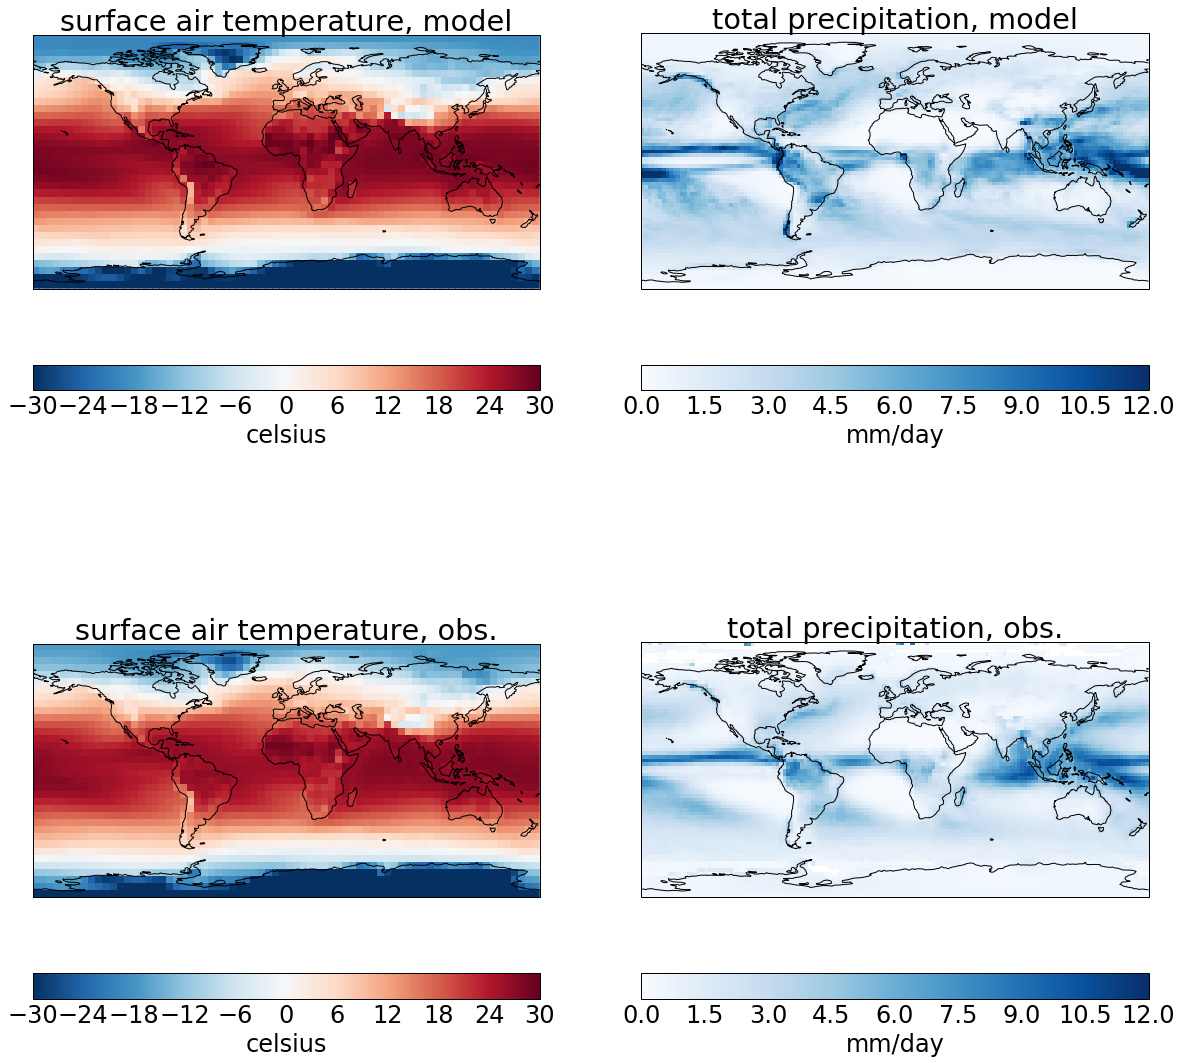

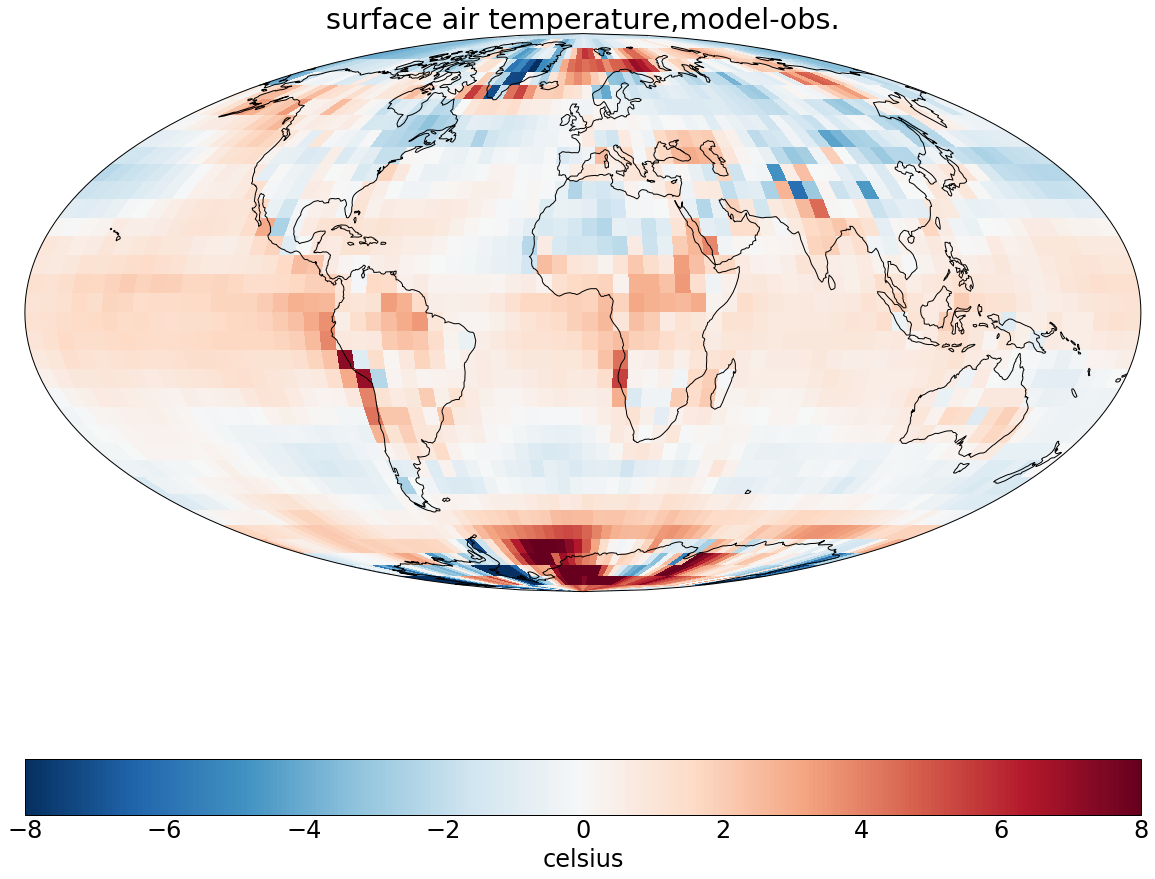

ERROR:shapely.geos:TopologyException: side location conflict at -1.0739529038485491e-09 -9020047.8480736464


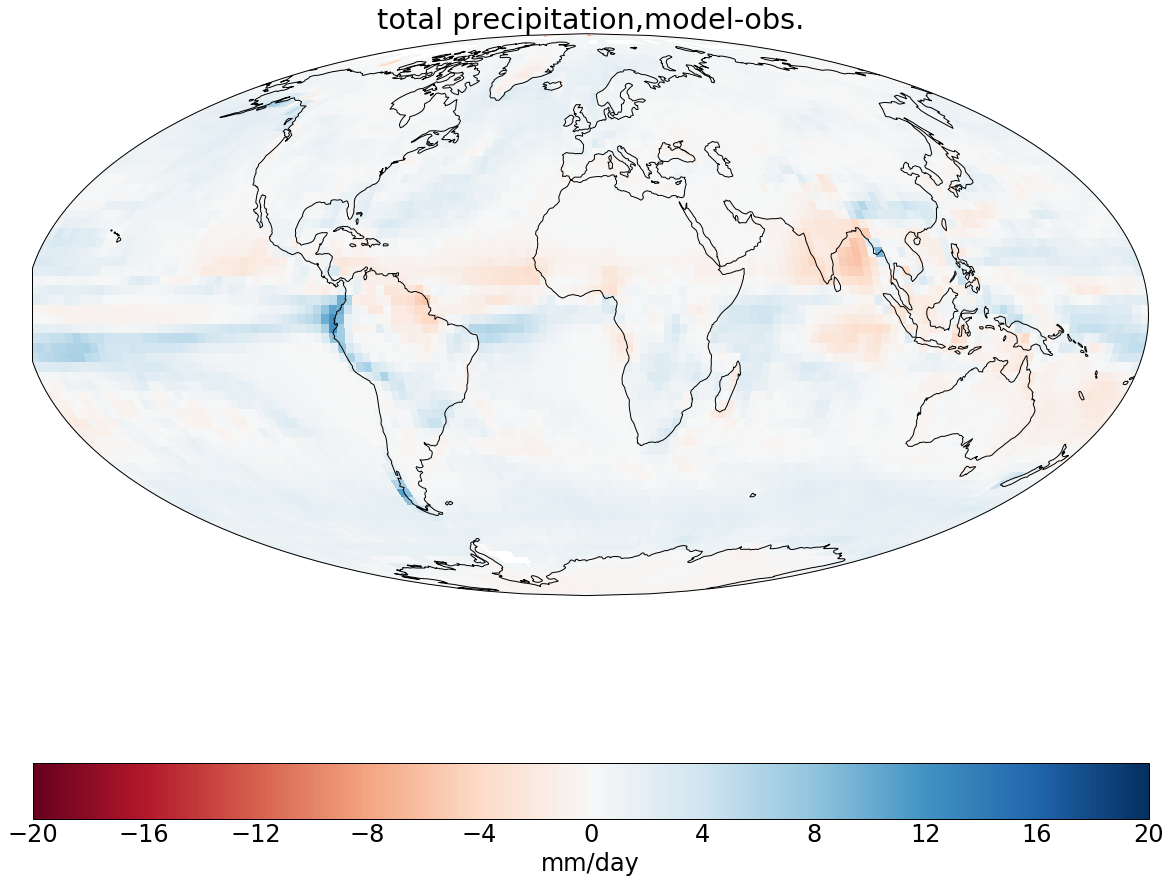

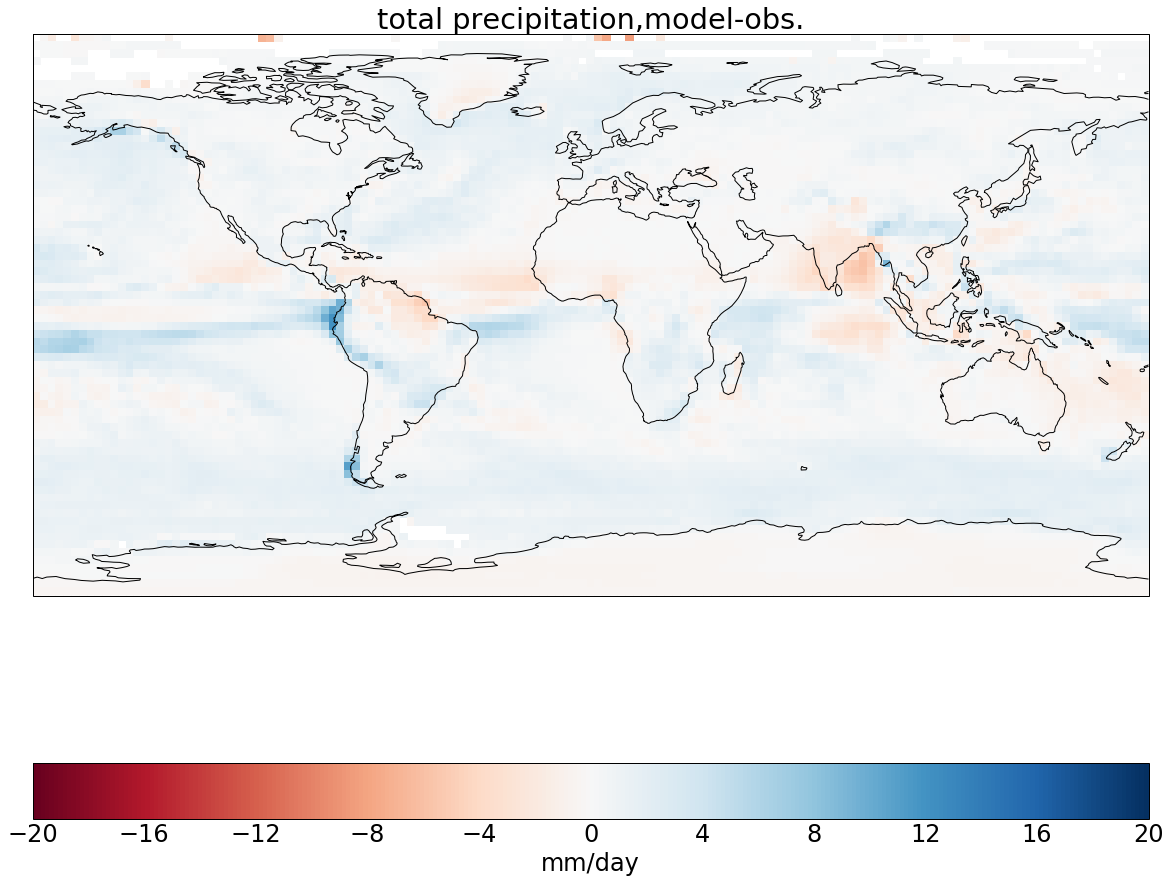

In [73]:
fig = plt.figure(figsize=(20,20))

for j in range(0,len(varnames)):# loop over different variables

    fname = '/home/williamsjh/cylc-run/'+dirnames[0]+'/share/data/History_Data/'+fnames[0]+'a.py19791201'

    cube_all = iris.load(fname, varnames[j])
    
    cube = cube_all[0]#.collapsed('time',iris.analysis.MEAN)
    
    for coord in cube.coords():
        coord.coord_system = None
    
    cmap = cmaps[j]
   
    if j == 0:#air temperature
        cube.data -= 273.15
        
        cube.units = 'celsius'
        
        cube_t = cube
        
        obs_all = iris.load_cube('/hpcf/data/williamsjh/obs/hadcrut/absolute.nc')
        obs_mean = obs_all.collapsed('time',iris.analysis.MEAN)
        
        obs_mean_t = obs_mean
               
    if j > 0:#precip
        cube.data *= 86400.
        
        cube.units = 'mm/day'
        
        cube_p = cube
        
        #cube_p.coord('longitude').points=cube_p.coord('longitude').points-180.
        
        obs_all=iris.load_cube('/hpcf/data/williamsjh/obs/cmap/precip.mon.mean.nc')    
                    
        daterange = iris.Constraint(
            time=lambda cell: PartialDateTime(year=1995, month=12) <= cell <
                PartialDateTime(year=2005, month=12))
        with iris.FUTURE.context(cell_datetime_objects=True):
            obs_daterange = obs_all.extract(daterange)
   
        obs_mean = obs_daterange.collapsed('time',iris.analysis.MEAN)
    
        obs_mean_p = obs_mean
    
    subplotnumber=[j+1,j+3]
     
    #fig = plt.figure(figsize=(20,20))   
        
    plt.subplot(2,2,subplotnumber[0])
    #ax = plt.axes(projection=ccrs.Mollweide())
    qplt.pcolormesh(cube.regrid(obs_mean,iris.analysis.Linear()), cmap=cmap, vmin=vmins[j], vmax=vmaxs[j])
    plt.gca().coastlines()
    plt.title(titles[j]+', model')  
        
    plt.subplot(2,2,subplotnumber[1])    
    #ax = plt.axes(projection=ccrs.Mollweide())
    qplt.pcolormesh(obs_mean, cmap=cmap, vmin=vmins[j], vmax=vmaxs[j])
    plt.gca().coastlines()
    plt.title(titles[j]+', obs.')   
        
iplt.show()

fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.Mollweide())
cmap=cmapdiffs[0]
qplt.pcolormesh(cube_t.regrid(obs_mean_t,iris.analysis.Linear())-obs_mean_t,
                cmap=cmap, vmin=vmindiffs[0], vmax=vmaxdiffs[0])
ax.coastlines()
plt.title(titles[0]+',model-obs.')  

iplt.show()
    
#--  

fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.Mollweide())
cmap=cmapdiffs[1]
qplt.pcolormesh(cube_p.regrid(obs_mean_p,iris.analysis.Linear())-obs_mean_p,
                cmap=cmap, vmin=vmindiffs[1], vmax=vmaxdiffs[1])
ax.coastlines()
plt.title(titles[1]+',model-obs.')  

iplt.show()

#--
    
fig = plt.figure(figsize=(20,20))
cmap=cmapdiffs[1]
qplt.pcolormesh(cube_p.regrid(obs_mean_p,iris.analysis.Linear())-obs_mean_p,
                cmap=cmap, vmin=vmindiffs[1], vmax=vmaxdiffs[1])
plt.gca().coastlines()
plt.title(titles[1]+',model-obs.')  

iplt.show()

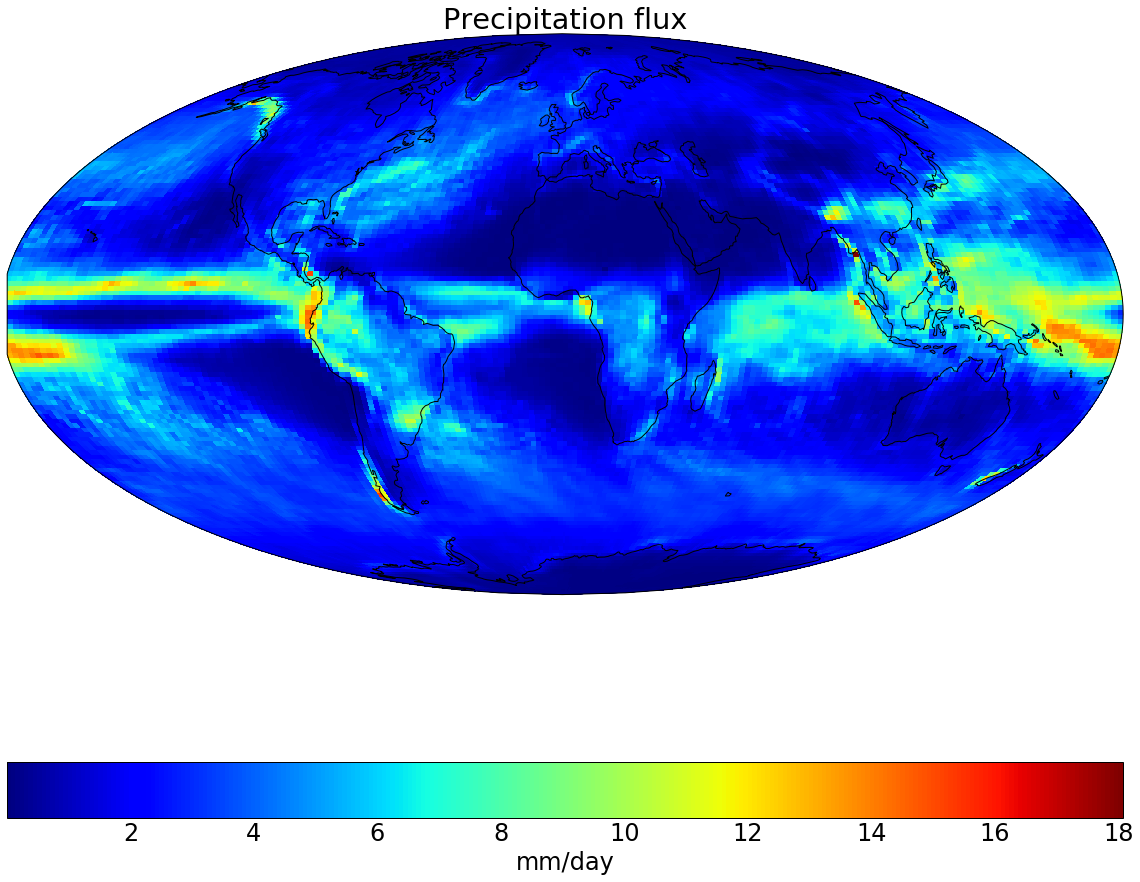

ERROR:shapely.geos:TopologyException: side location conflict at -1.0739529038485491e-09 -9020047.8480736464


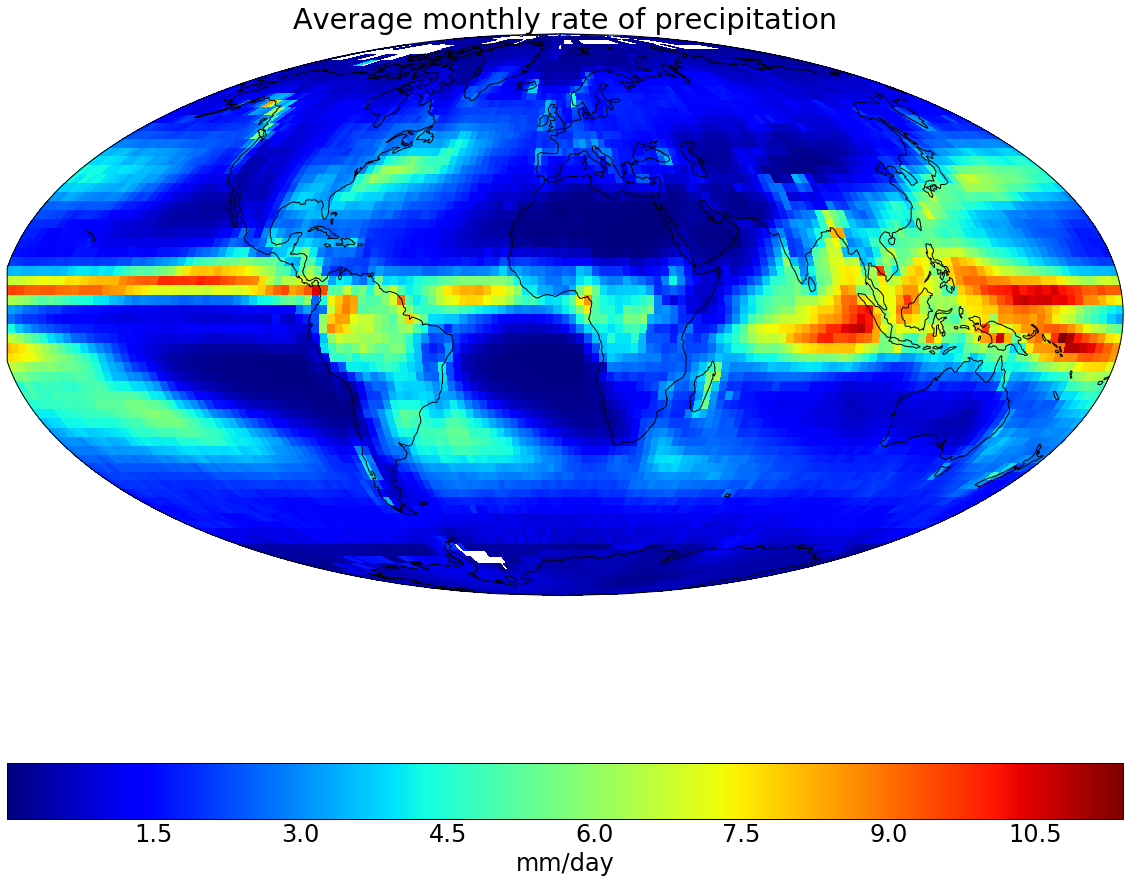

In [81]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.Mollweide())
qplt.pcolormesh(cube_p)
plt.gca().coastlines() 

iplt.show()
#--
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.Mollweide())
qplt.pcolormesh(obs_mean_p)
plt.gca().coastlines() 

iplt.show()
#--


# SSS - model



In [85]:
fname = '/home/williamsjh/cylc-run/'+dirnames[0]+\
   '/share/data/History_Data/NEMOhist/'+fnames[0]+'o_10d_*_grid_T.nc'    

In [86]:
def callback(cube, field, filename):
    if 'vosaline' != cube.metadata.var_name:
        raise iris.exceptions.IgnoreCubeException()

In [87]:
import iris

cubes = iris.load(fname, 'sea_water_practical_salinity', callback=callback)

cubes = cubes.extract(iris.Constraint(depth=5.05760014e-01))

from iris.experimental.equalise_cubes import equalise_attributes
equalise_attributes(cubes)

cubes=cubes.concatenate_cube()

The following cell is an additional way of renaming variables, thanks to Ruth Comer at the Met office! https://groups.google.com/forum/#!topic/scitools-iris/QItdG3CrbvI

The code is commented out since I am using another method for this currently. Included for completeness.

In [88]:
# time1 = cubes.dim_coords[0]
# time2 = cubes.aux_coords[0]
# time1.rename('dim_time')
# time2.rename('aux_time')

In [89]:
cubes.remove_coord((cubes.coords(var_name="time_counter"))[0])

In [90]:
cube = cubes.collapsed('time',iris.analysis.MEAN)

In [111]:
target_proj_north = ccrs.Stereographic(central_latitude=90, central_longitude=0)
new_cube_north, extent = iris.analysis.cartography.project(cube, target_proj_north,
                                                     nx=360, ny=360)
mask_north = new_cube_north
mask_north.data = np.ma.masked_where(new_cube_north.data == 0, new_cube_north.data)

In [112]:
target_proj_south = ccrs.Stereographic(central_latitude=-41.2865, central_longitude=174.7762)
new_cube_south, extent = iris.analysis.cartography.project(cube, target_proj_south,
                                                     nx=360, ny=360)
mask_south = new_cube_south
mask_south.data = np.ma.masked_where(new_cube_south.data == 0, new_cube_south.data)

In [113]:
x_north = new_cube_north.coord('projection_x_coordinate').points
y_north = new_cube_north.coord('projection_y_coordinate').points

d_north = new_cube_north.data




In [114]:
x_south = new_cube_south.coord('projection_x_coordinate').points
y_south = new_cube_south.coord('projection_y_coordinate').points

d_south = new_cube_south.data




# sss - obs

In [116]:
fname_obs = '/hpcf/data/williamsjh/obs/ecmwf/ocean/ftp.icdc.zmaw.de/EASYInit/ORA-XBTC/*.nc'


In [117]:
level_constraint = iris.Constraint(z_below_msl=5.)
iris.FUTURE.netcdf_promote=True
obs_all = iris.load(fname_obs, level_constraint)

In [118]:
obs_all=obs_all.concatenate()

In [119]:
obs=obs_all[0]

In [120]:
daterange = iris.Constraint(
            t=lambda cell: PartialDateTime(year=1995, month=12) <= cell <
                PartialDateTime(year=2005, month=12))
with iris.FUTURE.context(cell_datetime_objects=True):
    obs_daterange = obs.extract(daterange)

In [121]:
obs_mean = obs_daterange.collapsed('t',iris.analysis.MEAN)

In [127]:
target_proj_obs_north = ccrs.Stereographic(central_latitude=90, central_longitude=0)
new_obs_north, extent_north = iris.analysis.cartography.project(obs_mean, target_proj_obs_north,
                                                     nx=360, ny=360)

In [128]:
target_proj_obs_south = ccrs.Stereographic(central_latitude=-41.2865, central_longitude=174.7762)
new_obs_south, extent_south = iris.analysis.cartography.project(obs_mean, target_proj_obs_south,
                                                     nx=360, ny=360)

In [129]:
x_obs_north = new_obs_north.coord('projection_x_coordinate').points
y_obs_north = new_obs_north.coord('projection_y_coordinate').points

d_obs_north = new_obs_north.data

In [130]:
x_obs_south = new_obs_south.coord('projection_x_coordinate').points
y_obs_south = new_obs_south.coord('projection_y_coordinate').points

d_obs_south = new_obs_south.data

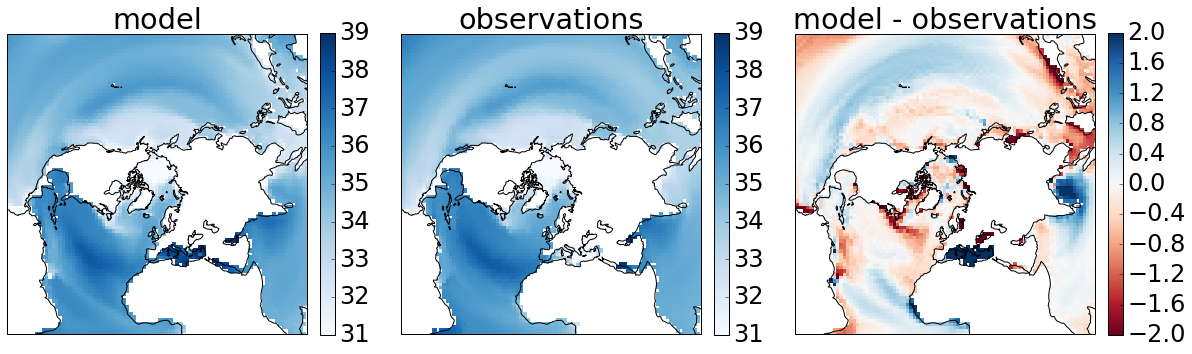

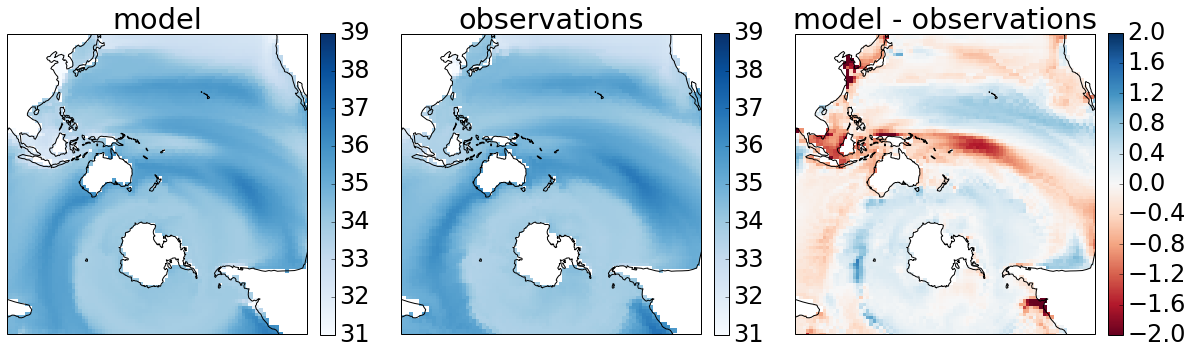

In [132]:
plt.figure(figsize=(20, 20))

ax = plt.subplot(1,3,1, projection=target_proj_north)
plt.title(new_cube.name())
plt.pcolormesh(x_north, y_north, d_north,vmin=31,vmax=39,cmap='Blues')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('model')
ax.coastlines()

ax.set_xlim(*(np.array(target_proj_north.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj_north.y_limits) / 4))
#plt.show()

#plt.figure(figsize=(10, 10))

ax = plt.subplot(1,3,2, projection=target_proj_obs_north)
plt.pcolormesh(x_obs_north, y_obs_north, d_obs_north,vmin=31,vmax=39,cmap='Blues')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('observations')
ax.coastlines()

ax.set_xlim(*(np.array(target_proj_obs_north.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj_obs_north.y_limits) / 4))
#plt.show()


#plt.figure(figsize=(10, 10))

ax = plt.subplot(1,3,3, projection=target_proj_obs_north)
plt.pcolormesh(x_obs_north, y_obs_north, d_north-d_obs_north,vmin=-2,vmax=2,cmap='RdBu')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('model - observations')
ax.coastlines()

ax.set_xlim(*(np.array(target_proj_obs_north.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj_obs_north.y_limits) / 4))
plt.show()

#--

plt.figure(figsize=(20, 20))

ax = plt.subplot(1,3,1, projection=target_proj_south)
plt.title(new_cube.name())
plt.pcolormesh(x_south, y_south, d_south,vmin=31,vmax=39,cmap='Blues')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('model')
ax.coastlines()

ax.set_xlim(*(np.array(target_proj_south.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj_south.y_limits) / 4))
#plt.show()

#plt.figure(figsize=(10, 10))

ax = plt.subplot(1,3,2, projection=target_proj_obs_south)
plt.pcolormesh(x_obs_south, y_obs_south, d_obs_south,vmin=31,vmax=39,cmap='Blues')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('observations')
ax.coastlines()

ax.set_xlim(*(np.array(target_proj_obs_south.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj_obs_south.y_limits) / 4))
#plt.show()


#plt.figure(figsize=(10, 10))

ax = plt.subplot(1,3,3, projection=target_proj_obs_south)
plt.pcolormesh(x_obs_south, y_obs_south, d-d_obs_south,vmin=-2,vmax=2,cmap='RdBu')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('model - observations')
ax.coastlines()

ax.set_xlim(*(np.array(target_proj_obs_south.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj_obs_south.y_limits) / 4))
plt.show()


#--




# SST - model



In [34]:
fname = '/home/williamsjh/cylc-run/'+dirnames[0]+\
    '/share/data/History_Data/NEMOhist/'+fnames[0]+'o_10d_*_grid_T.nc'

In [35]:
def callback(cube, field, filename):
    if 'votemper' != cube.metadata.var_name:
        raise iris.exceptions.IgnoreCubeException()

In [36]:
import iris

cubes = iris.load(fname, 'sea_water_potential_temperature', callback=callback)

cubes = cubes.extract(iris.Constraint(depth=5.05760014e-01))

from iris.experimental.equalise_cubes import equalise_attributes
equalise_attributes(cubes)

cubes=cubes.concatenate_cube()

cubes.remove_coord((cubes.coords(var_name="time_counter"))[0])

In [37]:
cube = cubes.collapsed('time',iris.analysis.MEAN)

In [38]:
target_proj_south = ccrs.Stereographic(central_latitude=-41.2865, central_longitude=174.7762)
new_cube_south, extent = iris.analysis.cartography.project(cube, target_proj_south,
                                                     nx=360, ny=360)
mask_south = new_cube_south
mask_south.data = np.ma.masked_where(new_cube_south.data == 0, new_cube_south.data)

target_proj_north = ccrs.Stereographic(central_latitude=90, central_longitude=0)
new_cube_north, extent = iris.analysis.cartography.project(cube, target_proj_north,
                                                     nx=360, ny=360)
mask_north = new_cube_north
mask_north.data = np.ma.masked_where(new_cube_north.data == 0, new_cube_north.data)



In [39]:
x_south = new_cube_south.coord('projection_x_coordinate').points
y_south = new_cube_south.coord('projection_y_coordinate').points

d_south = new_cube_south.data



x_north = new_cube_north.coord('projection_x_coordinate').points
y_north = new_cube_north.coord('projection_y_coordinate').points

d_north = new_cube_north.data





# sst - obs 

In [40]:
fname_obs = ('/hpcf/data/williamsjh/obs/hadisst/sst/HadISST_sst.nc')

obs = iris.load_cube(fname_obs,'sea_surface_temperature')

obs_all = obs

The next cell sets any values of -1000 to NaN. These values represent sea ice.

In [41]:
obs_all.data[obs_all.data == -1000.]=np.nan

In [42]:
daterange = iris.Constraint(
            time=lambda cell: PartialDateTime(year=1995, month=12) <= cell <
                PartialDateTime(year=2005, month=12))
with iris.FUTURE.context(cell_datetime_objects=True):
    obs_daterange = obs_all.extract(daterange)
   
obs_mean = obs_daterange.collapsed('time',iris.analysis.MEAN)

In [43]:
target_proj_obs_south = ccrs.Stereographic(central_latitude=-41.2865, central_longitude=174.7762)
target_proj_obs_north = ccrs.Stereographic(central_latitude=90, central_longitude=0)

new_obs_south, extent = iris.analysis.cartography.project(obs_mean, target_proj_obs_south,nx=360, ny=360)
new_obs_north, extent = iris.analysis.cartography.project(obs_mean, target_proj_obs_north,nx=360, ny=360)

In [44]:
x_obs_south = new_obs_south.coord('projection_x_coordinate').points
y_obs_south = new_obs_south.coord('projection_y_coordinate').points

x_obs_north = new_obs_north.coord('projection_x_coordinate').points
y_obs_north = new_obs_north.coord('projection_y_coordinate').points


d_obs_south = new_obs_south.data
d_obs_north = new_obs_north.data

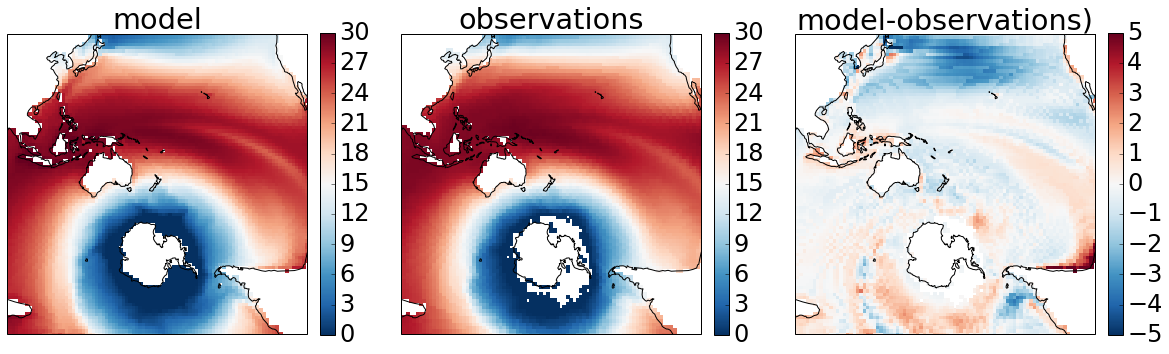

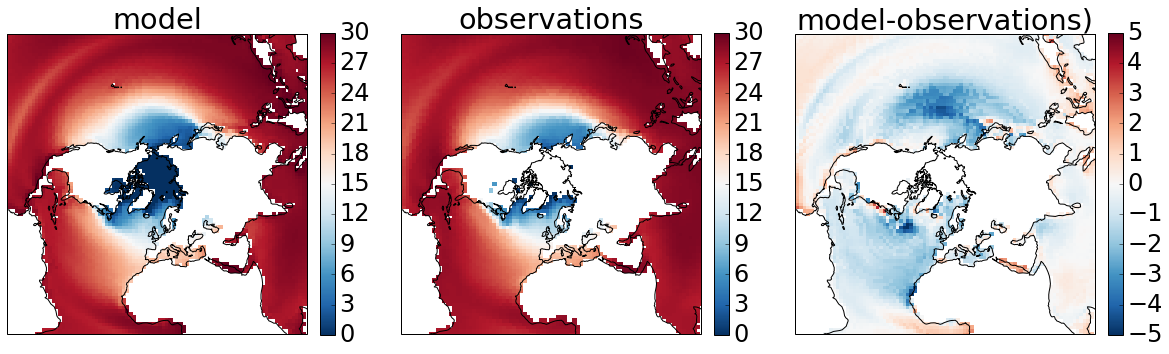

In [46]:



plt.figure(figsize=(20, 20))

ax = plt.subplot(1,3,1, projection=target_proj_south)
plt.title(new_cube_south.name())
plt.pcolormesh(x, y, d,vmin=0,vmax=30,cmap='RdBu_r')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('model')
ax.coastlines()

ax.set_xlim(*(np.array(target_proj_south.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj_south.y_limits) / 4))
#plt.show()

#plt.figure(figsize=(10, 10))

ax = plt.subplot(1,3,2 ,projection=target_proj_obs_south)
plt.pcolormesh(x_obs_south,y_obs_south,new_obs_south.data,vmin=0,vmax=30,cmap='RdBu_r')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('observations')
ax.coastlines()

ax.set_xlim(*(np.array(target_proj_obs_south.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj_obs_south.y_limits) / 4))
#plt.show()


#plt.figure(figsize=(10, 10))

ax = plt.subplot(1,3,3, projection=target_proj_obs_south)
plt.pcolormesh(x_obs_south,y_obs_south,d_south-new_obs_south.data,vmin=-5,vmax=5,cmap='RdBu_r')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('model-observations')
ax.coastlines()

ax.set_xlim(*(np.array(target_proj_obs_south.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj_obs_south.y_limits) / 4))

plt.show()



#--






plt.figure(figsize=(20, 20))

ax = plt.subplot(1,3,1, projection=target_proj_north)
plt.title(new_cube_north.name())
plt.pcolormesh(x_north, y_north, d_north,vmin=0,vmax=30,cmap='RdBu_r')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('model')
ax.coastlines()

ax.set_xlim(*(np.array(target_proj_north.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj_north.y_limits) / 4))
#plt.show()

#plt.figure(figsize=(10, 10))

ax = plt.subplot(1,3,2 ,projection=target_proj_obs_north)
plt.pcolormesh(x_obs_north,y_obs_north,new_obs_north.data,vmin=0,vmax=30,cmap='RdBu_r')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('observations')
ax.coastlines()

ax.set_xlim(*(np.array(target_proj_obs_north.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj_obs_north.y_limits) / 4))
#plt.show()


#plt.figure(figsize=(10, 10))

ax = plt.subplot(1,3,3, projection=target_proj_obs_north)
plt.pcolormesh(x_obs_north,y_obs_north,d_north-new_obs_north.data,vmin=-5,vmax=5,cmap='RdBu_r')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('model-observations')
ax.coastlines()

ax.set_xlim(*(np.array(target_proj_obs_north.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj_obs_north.y_limits) / 4))

plt.show()





# sea ice - model

In [6]:
fname = '/home/williamsjh/cylc-run/'+dirnames[0]+\
    '/share/data/History_Data/CICEhist/'+fnames[0]+'i.10d.*.nc'    

In [7]:
cubes = iris.load(fname,'ice area  (aggregate)')
from iris.experimental.equalise_cubes import equalise_attributes
equalise_attributes(cubes)

/opt/niwa/anaconda/Anaconda-2.4.1-Python-2.7/lib/python2.7/site-packages/iris/fileformats/cf.py:1140: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/opt/niwa/anaconda/Anaconda-2.4.1-Python-2.7/lib/python2.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1554: UserWarning: Ignoring netCDF variable u'mlt_onset' invalid units u'day of year'
  warnings.warn(msg.encode('ascii', errors='backslashreplace'))
/opt/niwa/anaconda/Anaconda-2.4.1-Python-2.7/lib/python2.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1554: UserWarning: Ignoring netCDF variable u'frz_onset' invalid units u'day of year'
  warnings.warn(msg.encode('ascii', errors='backsl

In [8]:
cubes_concat=cubes.concatenate_cube()

In [9]:
cubes_mean = cubes_concat.collapsed('time',iris.analysis.MEAN)

In [10]:
target_proj_south = ccrs.Stereographic(central_latitude=-90, central_longitude=174.7762)
target_proj_north = ccrs.Stereographic(central_latitude=90, central_longitude=0)

new_cube_south, extent = iris.analysis.cartography.project(cubes_mean, target_proj_south,nx=360, ny=360)
new_cube_north, extent = iris.analysis.cartography.project(cubes_mean, target_proj_north,nx=360, ny=360)

/opt/niwa/anaconda/Anaconda-2.4.1-Python-2.7/lib/python2.7/site-packages/iris/analysis/cartography.py:548: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '


In [12]:
x_south = new_cube_south.coord('projection_x_coordinate').points
y_south = new_cube_south.coord('projection_y_coordinate').points

x_north = new_cube_north.coord('projection_x_coordinate').points
y_north = new_cube_north.coord('projection_y_coordinate').points


d_south = new_cube_south.data
d_south=np.squeeze(d_south)

d_north = new_cube_north.data
d_north=np.squeeze(d_north)

# sea ice - obs

In [13]:
fname_obs = ('/hpcf/data/williamsjh/obs/hadisst/ice/HadISST_ice.nc')

obs = iris.load_cube(fname_obs,'sea_ice_area_fraction')#,'NOAA/NSIDC Climate Data Record of Passive Microwave Monthly Southern Hemisphere Sea Ice Concentration')

obs_all = obs

In [14]:
daterange = iris.Constraint(
            time=lambda cell: PartialDateTime(year=1995, month=12) <= cell <
                PartialDateTime(year=2005, month=12))
with iris.FUTURE.context(cell_datetime_objects=True):
    obs_daterange = obs_all.extract(daterange)
   
obs_mean = obs_daterange.collapsed('time',iris.analysis.MEAN)

/opt/niwa/anaconda/Anaconda-2.4.1-Python-2.7/lib/python2.7/site-packages/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'time'.
  warnings.warn(msg.format(self.name()))


In [15]:
target_proj_obs_south = ccrs.Stereographic(central_latitude=-90, central_longitude=174.7762)
target_proj_obs_north = ccrs.Stereographic(central_latitude=90, central_longitude=0)

new_obs_south, extent = iris.analysis.cartography.project(obs_mean, target_proj_obs_south,nx=360, ny=360)
new_obs_north, extent = iris.analysis.cartography.project(obs_mean, target_proj_obs_north,nx=360, ny=360)

In [16]:
x_obs_south = new_obs_south.coord('projection_x_coordinate').points
y_obs_south = new_obs_south.coord('projection_y_coordinate').points

x_obs_north = new_obs_north.coord('projection_x_coordinate').points
y_obs_north = new_obs_north.coord('projection_y_coordinate').points


d_obs_south = new_obs_south.data
d_obs_north = new_obs_north.data

Following subplot example using code from http://scitools.org.uk/cartopy/docs/v0.13/matplotlib/advanced_plotting.html

Colorbar cheat from http://stackoverflow.com/questions/18195758/set-matplotlib-colorbar-size-to-match-graph

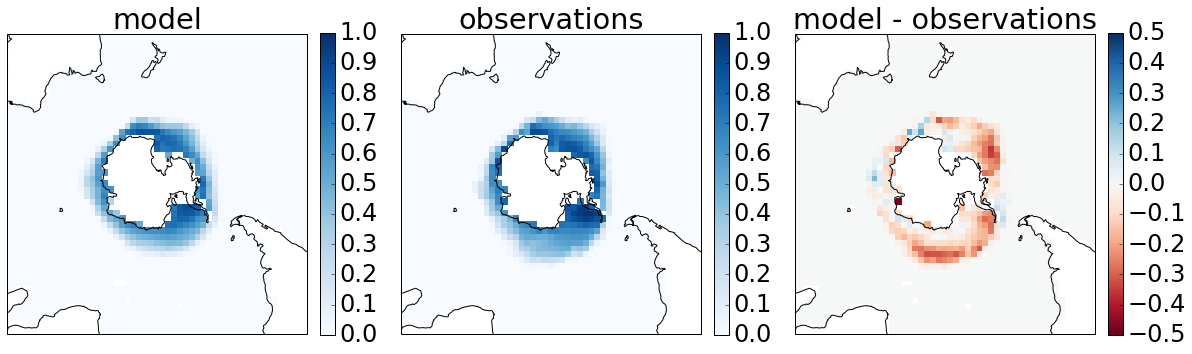

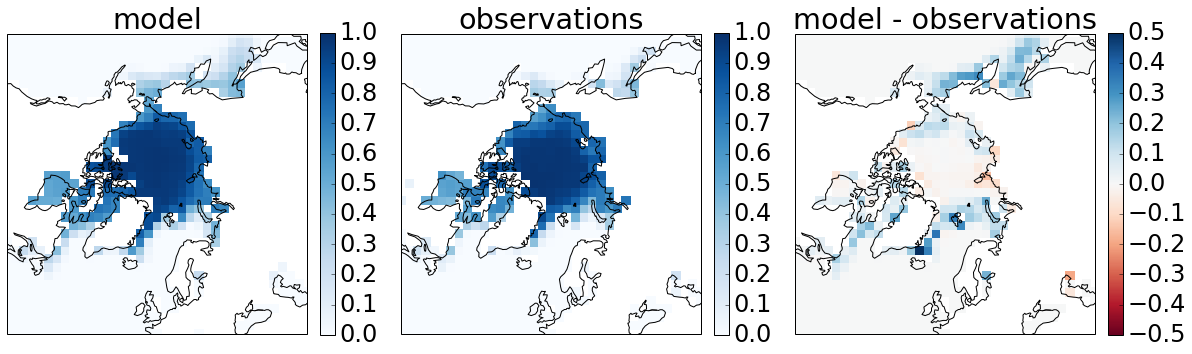

In [85]:

plt.figure(figsize=(20, 20))

ax = plt.subplot(1,3,1, projection=target_proj_south)
plt.pcolormesh(x_south, y_south, d_south,vmin=0,vmax=1,cmap='Blues')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('model')
ax.coastlines()
ax.set_xlim(*(np.array(target_proj_south.x_limits) / 7))
ax.set_ylim(*(np.array(target_proj_south.y_limits) / 7))


ax = plt.subplot(1,3,2, projection=target_proj_obs_south)
plt.pcolormesh(x_obs_south,y_obs_south,new_obs_south.data,vmin=0,vmax=1,cmap='Blues')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('observations')
ax.coastlines()
ax.set_xlim(*(np.array(target_proj_obs_south.x_limits) / 7))
ax.set_ylim(*(np.array(target_proj_obs_south.y_limits) / 7))

    
ax = plt.subplot(1,3,3, projection=target_proj_south)
plt.pcolormesh(x_south, y_south, d_south-new_obs_south.data,vmin=-0.5,vmax=0.5,cmap='RdBu')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('model - observations')
ax.coastlines()
ax.set_xlim(*(np.array(target_proj_south.x_limits) / 7))
ax.set_ylim(*(np.array(target_proj_south.y_limits) / 7))
plt.show()
    
#--

plt.figure(figsize=(20, 20))
    
ax = plt.subplot(1,3,1, projection=target_proj_north)
plt.pcolormesh(x_north, y_north, d_north,vmin=0,vmax=1,cmap='Blues')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('model')
ax.coastlines()

ax.set_xlim(*(np.array(target_proj_north.x_limits) / 10))
ax.set_ylim(*(np.array(target_proj_north.y_limits) / 10))
#plt.show()

#plt.figure(figsize=(10, 10))

ax = plt.subplot(1,3,2, projection=target_proj_obs_north)
plt.pcolormesh(x_obs_north,y_obs_north,new_obs_north.data,vmin=0,vmax=1,cmap='Blues')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('observations')
ax.coastlines()

ax.set_xlim(*(np.array(target_proj_obs_north.x_limits) / 10))
ax.set_ylim(*(np.array(target_proj_obs_north.y_limits) / 10))
#plt.show()

#plt.figure(figsize=(10, 10))

ax = plt.subplot(1,3,3, projection=target_proj_north)
plt.pcolormesh(x_north, y_north, d_north-new_obs_north.data,vmin=-0.5,vmax=.5,cmap='RdBu')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('model - observations')
ax.coastlines()
 
ax.set_xlim(*(np.array(target_proj_north.x_limits) / 10))
ax.set_ylim(*(np.array(target_proj_north.y_limits) / 10))
plt.show()

